Copy main.py over here and run with DEBUG = True

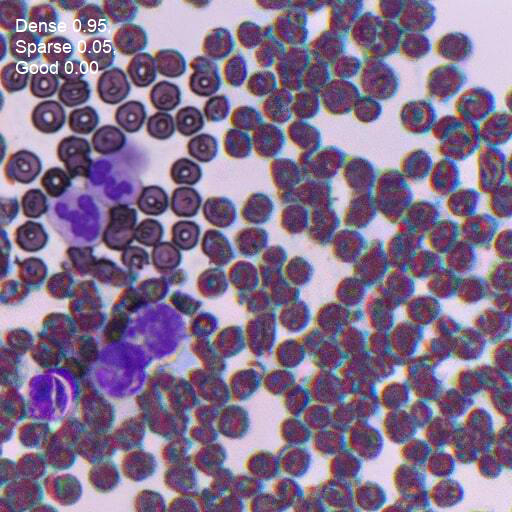

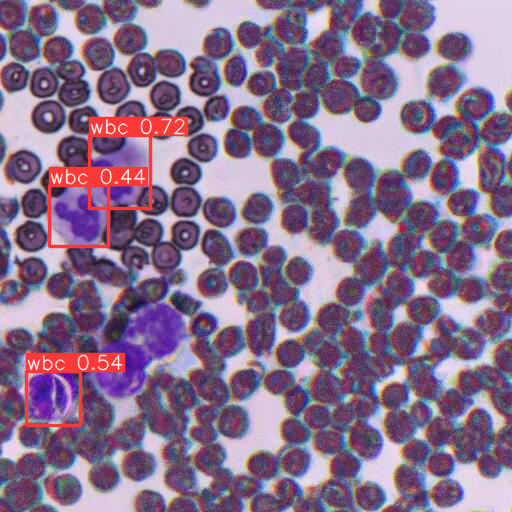

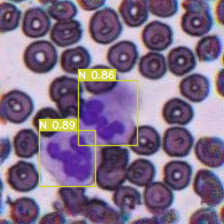

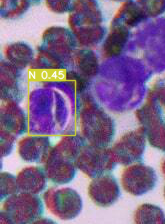

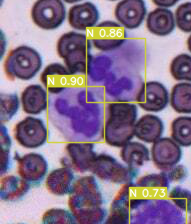

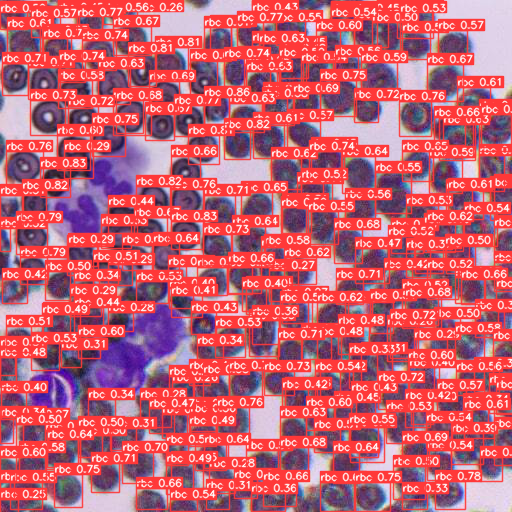

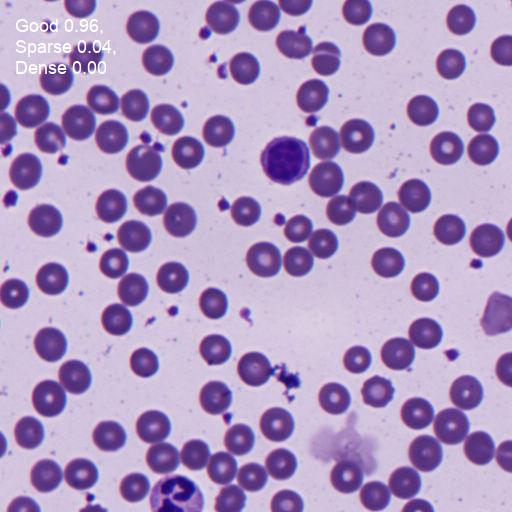

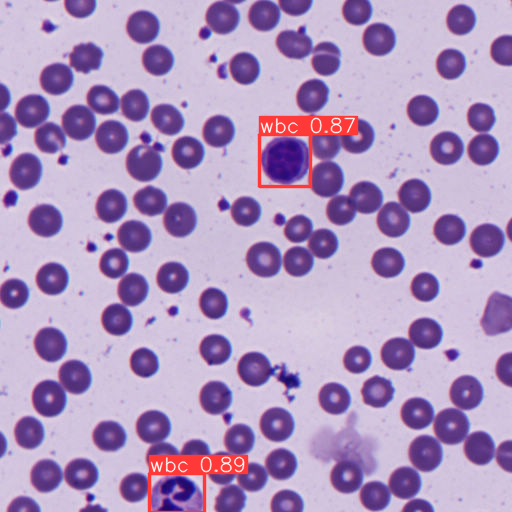

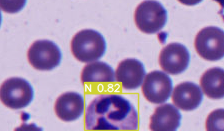

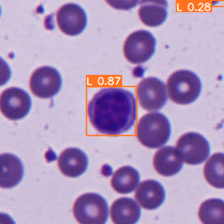

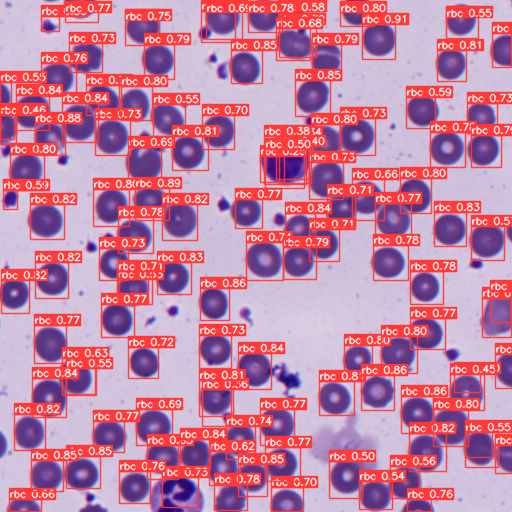

ScanResult(wbc={'N': 4, 'L': 1}, rbc=288)


In [1]:

from typing import NamedTuple, Dict, Counter
from PIL import Image
import tifffile
import torch
from Detectors import WhiteBloodCellDetector, RedBloodCellDetector, BloodDensityDetector
import os


# SETUP GPU
device = "0" if torch.cuda.is_available() else "cpu"
if device == "0":
    torch.cuda.set_device(0)
###

ScanResult = NamedTuple("ScanResult", [("wbc", Dict), ("rbc", int)])

def process_image(image: Image) -> ScanResult:
    bloodDensityDetector = BloodDensityDetector("models/blood-smear-density-Apr10.pt", DEBUG=True)

    if not bloodDensityDetector.hasGoodDensity(image) and False:
        # scan is not good, return empty result
        return ScanResult({}, 0)

    wbcDetector = WhiteBloodCellDetector("models/wbc-detection-Feb24.pt", "models/wbc-classification-Sep23.pt", DEBUG=True)
    rbcDetector = RedBloodCellDetector("models/rbc-detection-Sep12.pt", DEBUG=True)
    wbc = wbcDetector.detect(image)
    rbc = rbcDetector.detect(image)

    return ScanResult(wbc, rbc)


if __name__ == '__main__':
    summary = ScanResult({}, 0)
    cropped_image = Image.open("samples/sample1.jpg")
    # for each file in folder "sample"
    for file in os.listdir("samples"):
        # open image
        image = Image.open("samples/" + file)
        # process image
        result = process_image(image)

        # combine results
        summary = ScanResult(dict(Counter(summary.wbc) + Counter(result.wbc)), summary.rbc + result.rbc)

    print(summary)
    # for ndpi in folder:
    #     process__ndpi(ndpi)
